# Run `JunctionSeq`

> A Utility for Detection of Differential Exon and Splice-Junction Usage in RNA-Seq data

http://bioconductor.org/packages/3.10/bioc/vignettes/JunctionSeq/inst/doc/JunctionSeq.pdf

http://hartleys.github.io/JunctionSeq/doc/example-walkthrough.pdf

http://www.bioconductor.org/packages/devel/workflows/vignettes/rnaseqDTU/inst/doc/rnaseqDTU.html


<!-- 1. Alignment 
- https://sailfish.readthedocs.io/en/master/sailfish.html

2. Splicing 
- https://www.biostars.org/p/200963/

Papers: 
- https://academic.oup.com/nar/article/44/15/e127/2457696
- https://academic.oup.com/bib/article/21/6/2052/5648232
- https://doi.org/10.1371/journal.pcbi.1007925 
> Improved methods for RNAseq-based alternative splicing analysis
https://www.nature.com/articles/s41598-021-89938-2
-->



## Alignment

> QoRTs is extremelly memory-hungry for coordinate-sorted files, despite its manual not making this point clear. If you have lots of memory, you my try increasing the JVM memory with -Xmx, for example -Xmx64g or even higher. Or sort your bam files by name (`samtools sort -n -O bam -o file.sort.bam file.bam`) and use the `--nameSorted` QoRTs parameter - for name-sorted bam files, memory usage is indeed low.
https://www.biostars.org/p/278221/

In [2]:
%%bash

for bam in bam/*bam; do
    sampleID=`basename $bam`
    sampleID=${sampleID/.bam/}
    out=${bam/.bam/.sort.bam}
    echo $sampleID
    
    cm="samtools sort -@ 12 -n -O bam -o "$out" "$bam
    # echo $cm
    $cm
    echo "=========================================="
    
done

hl60_120h_t_1
hl60_120h_t_2
hl60_120h_u_1
hl60_120h_u_2
hl60_6h_t_1
hl60_6h_t_2
hl60_6h_u_1
hl60_6h_u_2
hl60_72h_t_1
hl60_72h_t_2
hl60_72h_u_1
hl60_72h_u_2
kg1_t_1
kg1_t_2
kg1_t_3
kg1_u_1
kg1_u_2
kg1_u_3
molm14_t_1
molm14_t_2
molm14_t_3
molm14_u_1
molm14_u_2
molm14_u_3
ociaml2_t_1
ociaml2_t_2
ociaml2_t_3
ociaml2_u_1
ociaml2_u_2
ociaml2_u_3
ociaml3_t_1
ociaml3_t_2
ociaml3_t_3
ociaml3_u_1
ociaml3_u_2
ociaml3_u_3
thp1_t_1
thp1_t_2
thp1_t_3
thp1_u_1
thp1_u_2
thp1_u_3


[bam_sort_core] merging from 24 files and 12 in-memory blocks...
[bam_sort_core] merging from 12 files and 12 in-memory blocks...
[bam_sort_core] merging from 36 files and 12 in-memory blocks...
[bam_sort_core] merging from 36 files and 12 in-memory blocks...
[bam_sort_core] merging from 0 files and 12 in-memory blocks...
[bam_sort_core] merging from 12 files and 12 in-memory blocks...
[bam_sort_core] merging from 0 files and 12 in-memory blocks...
[bam_sort_core] merging from 0 files and 12 in-memory blocks...
[bam_sort_core] merging from 24 files and 12 in-memory blocks...
[bam_sort_core] merging from 0 files and 12 in-memory blocks...
[bam_sort_core] merging from 0 files and 12 in-memory blocks...
[bam_sort_core] merging from 12 files and 12 in-memory blocks...
[bam_sort_core] merging from 12 files and 12 in-memory blocks...
[bam_sort_core] merging from 0 files and 12 in-memory blocks...
[bam_sort_core] merging from 12 files and 12 in-memory blocks...
[bam_sort_core] merging from 12

## Generate count files 

https://anaconda.org/bioconda/qorts

In [3]:
!mkdir -p iso
!mkdir -p iso/rawCts
!mkdir -p iso/annoFiles

> #### Alignment
> QoRTs [4], which is used to generate read counts, is designed to run on pairedend or single-end next-gen RNA-Seq data. The data must first be aligned (or
"mapped") to a reference genome. RNA-Star [5], GSNAP [6], and TopHat2 [7]
are all popular and effective aligners for use with RNA-Seq data. The use of
short-read or unspliced aligners such as BowTie, ELAND, BWA, or Novoalign
is NOT recommended.

In [7]:
ls ~/Workflows/QoRTs-STABLE.jar

/data_gilbert/home/aarab/Workflows/QoRTs-STABLE.jar


In [3]:
%%bash

GTF='~/genomes/hg38/gencode.v34/gencode.v34.annotation.gtf'

touch QoRTs.sh
for bam in bam/*sort.bam; do
    sampleID=`basename $bam`
    sampleID=${sampleID/.sort.bam/}
    
    # echo $sampleID
    cm="java -Xmx60G -jar ~/Workflows/QoRTs-STABLE.jar QC --stranded_fr_secondstrand --singleEnded --nameSorted "$bam" "$GTF" iso/rawCts/"$sampleID"/ &> iso/rawCts/"${sampleID}".log"
    # --stranded --singleEnded 
    echo $cm >> QoRTs.sh;
    # $cm;
    # wait
    
done

> The above command will generate a count file `rawCts/sampleID/QC.spliceJunctionAndExonCounts.forJunctionSeq.txt.gz`.
This file contains both gene-level coverage counts, as well as coverage counts
for transcript subunits such as exons and splice junction loci. It will also generate two additional secondary count files (one with all known splice counts,
the other with all novel splice counts) which may be needed if you wish to add
novel splice junctions to your analysis (see Section 4.4).

In [13]:
ls iso/rawCts/

hl60_120h_t_1/     hl60_72h_u_1.log  molm14_u_1/      ociaml3_t_2.log
hl60_120h_t_1.log  hl60_72h_u_2/     molm14_u_1.log   ociaml3_t_3/
hl60_120h_t_2/     hl60_72h_u_2.log  molm14_u_2/      ociaml3_t_3.log
hl60_120h_t_2.log  kg1_t_1/          molm14_u_2.log   ociaml3_u_1/
hl60_120h_u_1/     kg1_t_1.log       molm14_u_3/      ociaml3_u_1.log
hl60_120h_u_1.log  kg1_t_2/          molm14_u_3.log   ociaml3_u_2/
hl60_120h_u_2/     kg1_t_2.log       ociaml2_t_1/     ociaml3_u_2.log
hl60_120h_u_2.log  kg1_t_3/          ociaml2_t_1.log  ociaml3_u_3/
hl60_6h_t_1/       kg1_t_3.log       ociaml2_t_2/     ociaml3_u_3.log
hl60_6h_t_1.log    kg1_u_1/          ociaml2_t_2.log  thp1_t_1/
hl60_6h_t_2/       kg1_u_1.log       ociaml2_t_3/     thp1_t_1.log
hl60_6h_t_2.log    kg1_u_2/          ociaml2_t_3.log  thp1_t_2/
hl60_6h_u_1/       kg1_u_2.log       ociaml2_u_1/     thp1_t_2.log
hl60_6h_u_1.log    kg1_u_3/          ociaml2_u_1.log  thp1_t_3/
hl60_6h_u_2/       kg1_u_3.log       ociaml2_u_2/     th

### 4.3 (Option 1) Including Only Annotated Splice Junction Loci

In [18]:
ls ~/genomes/hg38/gencode.v34/gencode.v34.annotation.gtf

/data_gilbert/home/aarab/genomes/hg38/gencode.v34/gencode.v34.annotation.gtf


In [1]:
# !rm -rv annoFiles

In [19]:
%%bash 
GTF='/data_gilbert/home/aarab/genomes/hg38/gencode.v34/gencode.v34.annotation.gtf'
GFF='iso/annoFiles/JunctionSeq.flat.gff.gz'

java -jar ~/Workflows/QoRTs-STABLE.jar makeFlatGff --stranded $GTF $GFF
# --stranded_fr_secondstrand --singleEnded

Starting QoRTs v1.3.6 (Compiled Tue Sep 25 11:21:46 EDT 2018)
Starting time: (Tue Jan 25 20:07:09 PST 2022)
INPUT_COMMAND(makeFlatGff)
  INPUT_ARG(infile)=/data_gilbert/home/aarab/genomes/hg38/gencode.v34/gencode.v34.annotation.gtf
  INPUT_ARG(outfile)=iso/annoFiles/JunctionSeq.flat.gff.gz
  INPUT_ARG(stranded)=true
FlatteningGtf: done.(2022-01-25 20:08:42)
Done. (Tue Jan 25 20:08:42 PST 2022)


### 4.4 (Option 2) Including Novel Splice Junction Loci

### multiQC

In [6]:
%%bash 
cd iso 
multiqc -n QoRTs-multiQC rawCts/
cd ../

[INFO   ]         multiqc : This is MultiQC v1.9
[INFO   ]         multiqc : Template    : default
[INFO   ]         multiqc : Searching   : /data_gilbert/home/aarab/Projects/Decitabine-treatment/RNA-seq/iso/rawCts
[INFO   ]           qorts : Found 42 logs
[INFO   ]         multiqc : Compressing plot data
[INFO   ]         multiqc : Report      : QoRTs-multiQC.html
[INFO   ]         multiqc : Data        : QoRTs-multiQC_data
[INFO   ]         multiqc : MultiQC complete


It looks good to me!

## Process count files 

First I made `iso2` conda env: 
    
    conda create -n iso2 -c bioconda bioconductor-genomicranges=1.38
    conda activate iso2
    
Then, I installed `JunctionSeq` locally using ...

    source("http://hartleys.github.io/JunctionSeq/install/JS.install.R");
    JS.install();



In [6]:
!cat run-JunctionSeq.R

args <- commandArgs(trailingOnly = TRUE)

PDIR <- args[1]
samplesheetPATH = args[2]
COND <- args[3]
refCOND <- args[4]
name <- args[5]

setwd(PDIR)
suppressMessages(suppressWarnings(library(tidyverse)))
suppressMessages(suppressWarnings(library(JunctionSeq)))
message ('R libraries loaded!')
suppressMessages(suppressWarnings(dir.create('iso')))
suppressMessages(suppressWarnings(dir.create(paste0("iso/",name))))
suppressMessages(suppressWarnings(dir.create(paste0("iso/",name,"/jscs"))))
suppressMessages(suppressWarnings(dir.create(paste0("iso/",name,"/plots/"))))

loadRData <- function(fileName){
    ## loads an RData file, and returns it 
    # https://stackoverflow.com/questions/5577221/how-can-i-load-an-object-into-a-variable-name-that-i-specify-from-an-r-data-file
    load(fileName)
    get(ls()[ls() != "fileName"])
}

if (file.exists(paste0("iso/",name,"/jscs/jscs.RData"))){
    jscs <- loadRData(paste0("iso/",name,"/jscs/jscs.RData"))

    message ('`jscs.RData` exists!')
    
} el

# Downstream 

## `genewiseResults`

In [77]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [146]:
import sys 
sys.path.append('../')
from util import cleanAxes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from adjustText import adjust_text
import seaborn as sns

In [535]:
def rank_plot_pvalue(df,ax, title=None,genes=None):
    
    df = df.sort_values(['geneWisePadj'])
    epsilon = df['geneWisePadj'][df['geneWisePadj'] != 0].min()
    
    df['geneWisePadj_rank'] = df.sort_values(['geneWisePadj'],ascending=False).reset_index().index + 1 
    df['geneWisePadj_log'] = -np.log10(df['geneWisePadj'] + epsilon)
    df = df.set_index('geneName')

    X = df['geneWisePadj_rank']
    Y = df['geneWisePadj_log']

    ax.scatter(X,
               Y,
               c = "teal",
               s = 10,
               # edgecolor = "black",
               # linewidth = 2,
               alpha = 0.7
              )

    # ax.legend()
    if genes:
        if type(genes)==int:
            n = genes 
            genes = list(X.sort_values().iloc[0:n].index)
        #For Labeling
        if type(genes) != list:
            x_lab = X.loc[[genes]]
            y_lab = Y.loc[[genes]]
        else:
            x_lab = X.loc[genes]
            y_lab = Y.loc[genes]
        # Outline Genes To label
        ax.scatter(x_lab,
                   y_lab,
                   c = "teal",
                   s = 50,
                   edgecolor = "lightblue",
                   linewidth = 1,
                   alpha = 0.7
                  )

        texts = []
        for x, y, s in zip(x_lab, y_lab, x_lab.index.tolist()):
            texts.append(ax.text(x, y, s))

        adjust_text(
            texts, force_points=0.2, force_text=0.2,
            expand_points=(2, 2), 
            expand_text=(2, 2),
            arrowprops=dict(arrowstyle="-", color='black', lw=0.2),
            ax=ax,
        )
    
    ax.set_xlabel(None)
    ax.set_yscale('symlog')
    cleanAxes(ax)
    ax.set_title(title,size=14)


In [536]:
df_6h   = pd.read_csv('iso/hl60_6h_delta_iso/jscs/sigGenes.genewiseResults.txt.gz',sep='\t')
df_72h  = pd.read_csv('iso/hl60_72h_delta_iso/jscs/sigGenes.genewiseResults.txt.gz',sep='\t')
df_120h = pd.read_csv('iso/hl60_120h_delta_iso/jscs/sigGenes.genewiseResults.txt.gz',sep='\t')

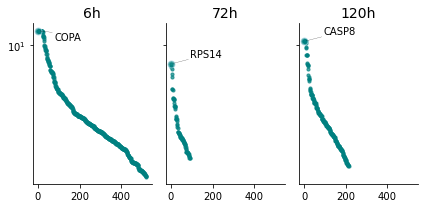

In [537]:
f, axes = plt.subplots(1, 3,figsize=(6,3))

axes[0].get_shared_y_axes().join(*axes)
axes[0].get_shared_x_axes().join(*axes)

rank_plot_pvalue(df_6h,  axes[0],genes=1,title='6h')
rank_plot_pvalue(df_72h, axes[1],genes=1,title='72h')
rank_plot_pvalue(df_120h,axes[2],genes=1,title='120h')

for i in [1,2]:
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='y',label1On=False)

f.tight_layout()
# f.savefig('')
plt.show()

## `results`

In [540]:
df_6h   = pd.read_csv('iso/hl60_6h_delta_iso/jscs/sigGenes.results.txt.gz',sep='\t')
# df_72h  = pd.read_csv('iso/hl60_72h_delta_iso/jscs/sigGenes.genewiseResults.txt.gz',sep='\t')
# df_120h = pd.read_csv('iso/hl60_120h_delta_iso/jscs/sigGenes.genewiseResults.txt.gz',sep='\t')

In [552]:
set(df_6h.featureType)

{'exonic_part', 'splice_site'}

In [555]:
df_6h.columns

Index(['featureID', 'geneID', 'countbinID', 'testable', 'status', 'allZero',
       'baseMean', 'baseVar', 'dispBeforeSharing', 'dispFitted', 'dispersion',
       'pvalue', 'padjust', 'chr', 'start', 'end', 'strand', 'transcripts',
       'featureType', 'padjust_noFilter', 'log2FC(Decitabine/DMSO)',
       'log2FCvst(Decitabine/DMSO)', 'expr_DMSO', 'expr_Decitabine',
       'geneWisePadj'],
      dtype='object')

In [550]:
df_6h[~df_6h.allZero]

,featureID,geneID,countbinID,testable,status,allZero,baseMean,baseVar,dispBeforeSharing,dispFitted,...,end,strand,transcripts,featureType,padjust_noFilter,log2FC(Decitabine/DMSO),log2FCvst(Decitabine/DMSO),expr_DMSO,expr_Decitabine,geneWisePadj
0,ENSG00000116288.13:E001,ENSG00000116288.13,E001,False,LOW_COUNTS_INDEP_FILTER,False,1.576026,3.179682,0.131963,0.206330,...,7954323,+,ENST00000493373.5,exonic_part,0.961383,NaN,NaN,NaN,NaN,3.652160e-09
1,ENSG00000116288.13:E002,ENSG00000116288.13,E002,True,OK,False,471.911424,3594.830714,0.000309,0.006006,...,7961691,+,ENST00000460192.5,exonic_part,0.177438,-0.321035,-0.160502,521.331754,422.658770,3.652160e-09
2,ENSG00000116288.13:E003,ENSG00000116288.13,E003,True,OK,False,506.409314,3352.794505,0.000095,0.005960,...,7961700,+,ENST00000460192.5;ENST00000493678.5,exonic_part,0.223329,-0.293744,-0.146856,554.488998,457.948682,3.652160e-09
3,ENSG00000116288.13:E004,ENSG00000116288.13,E004,True,OK,False,600.378737,4669.088097,0.002974,0.005862,...,7961710,+,ENST00000460192.5;ENST00000493678.5;ENST000003...,exonic_part,0.650891,-0.273228,-0.136597,651.198600,546.320694,3.652160e-09
4,ENSG00000116288.13:E005,ENSG00000116288.13,E005,True,OK,False,1837.592820,29454.363452,0.006440,0.005507,...,7961735,+,ENST00000460192.5;ENST00000493678.5;ENST000003...,exonic_part,0.967760,-0.123193,-0.061567,1898.335731,1776.812347,3.652160e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28169,ENSG00000184216.14:J058,ENSG00000184216.14,J058,False,LOW_COUNTS_INDEP_FILTER,False,23.324141,217.160726,0.007160,0.017860,...,154018598,-,ENST00000429936.6;ENST00000393687.6;ENST000004...,splice_site,0.010901,NaN,NaN,NaN,NaN,3.710530e-08
28170,ENSG00000184216.14:J059,ENSG00000184216.14,J059,False,LOW_COUNTS_INDEP_FILTER,False,16.178014,37.415212,0.011538,0.022815,...,154018974,-,ENST00000429936.6;ENST00000393687.6;ENST000003...,splice_site,0.710060,NaN,NaN,NaN,NaN,3.710530e-08
28171,ENSG00000184216.14:J060,ENSG00000184216.14,J060,True,OK,False,38.121679,99.792823,0.019023,0.013506,...,154019196,-,ENST00000429936.6;ENST00000393687.6;ENST000003...,splice_site,0.966168,0.296873,0.148433,32.593999,42.151988,3.710530e-08
28172,ENSG00000184216.14:J061,ENSG00000184216.14,J061,False,LOW_COUNTS_INDEP_FILTER,False,9.919710,8.519666,0.000514,0.033018,...,154019430,-,ENST00000429936.6;ENST00000393687.6;ENST000003...,splice_site,0.959519,NaN,NaN,NaN,NaN,3.710530e-08


In [ ]:
# genewiseResults 2 binary 

In [27]:
!date

Sun Feb  6 20:54:41 PST 2022
